In [4]:
# Tasks
# 1. data extraction, column naming, value counts, summary stats, 
# 2. load full data (partial columns, full columns, random sample)
# 3. nlp on body, date counts, usr and msg distinct counts, skip
# 4. figure out what the max col usage is for, and what does each of the filler columns mean
# 5. json extraction

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.width', 1000)

In [6]:
INPATH = '/Users/pranjal/Downloads/cleaned.csv'
import pandas as pd
df = pd.read_csv(INPATH).iloc[:, 1:]
df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,userid,event,msgid,cts,deviceCode,currentLoyaltyLevel,rowId,message,userId,transactionId,nudgeId,activationAmount,treeId,loyaltyLevel,cardType,creationDate,product,birthDate,date,yearmonth
0,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,a47fd3cc-c9db-432b-9f50-d8aa76bf35a5,2021-10-04T16:41:36.000Z,a7ebd2ee-72aa-45fc-9825-246bc55eabdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-04,2021-10
1,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,d0a2fb86-3f38-48f9-9106-61b2771f493d,2021-09-28T09:25:02.000Z,a44e3f40-511c-452a-99c8-7be335680c9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-28,2021-09
2,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,625cda9f-6a43-4070-9630-a3e6774c2690,2021-10-29T09:07:50.000Z,NaN,Fan2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-29,2021-10
3,02650cc5-b4da-483a-96cc-4b6a5119a808,LoyaltyLevelChanged,390d362a-4b31-4a71-bba0-5b8165a12a27,2022-02-08T13:08:18.000Z,NaN,NaN,13102673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08,2022-02
4,02650cc5-b4da-483a-96cc-4b6a5119a808,TransactionConfirmed,6d8bc20c-ffb9-49bb-856e-68f683a5e9d5,2022-05-10T23:14:09.000Z,a070a268-5417-4450-9414-8cf98682c453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10,2022-05


# Overview

In [7]:
print(df.shape)

(921211, 20)


In [8]:
# Null Counts
df.isnull().sum()

userid                      0
event                       0
msgid                       0
cts                        73
deviceCode             370251
currentLoyaltyLevel    917431
rowId                  696331
message                891212
userId                 868862
transactionId          875442
nudgeId                914854
activationAmount       920573
treeId                 920096
loyaltyLevel           920866
cardType               920727
creationDate           920878
product                921140
birthDate              917081
date                       73
yearmonth                  73
dtype: int64

In [21]:
df.event.value_counts()

UserSignedIn              550961
TransactionConfirmed      134379
EcoBalanceDataComputed     90501
NudgeCreated               82330
TransactionCreated         45769
NudgeRead                   6357
RiskLevelEvaluated          4225
LoyaltyLevelChanged         3780
TreeAcquired                1115
PhysicalCardRequested        994
SubscriptionActivated        800
Name: event, dtype: int64

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

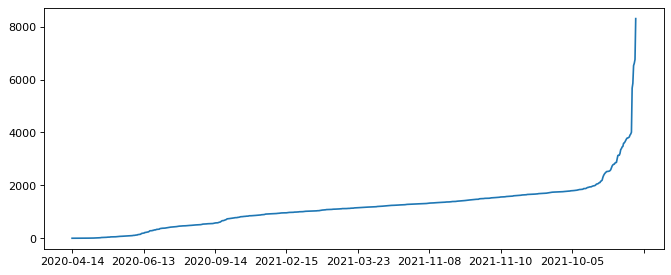

In [48]:
# Events over time
from matplotlib.pyplot import figure
figure(figsize=(10, 4), dpi=80)
import matplotlib.pyplot as plt
df.date.value_counts().sort_values().plot()

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

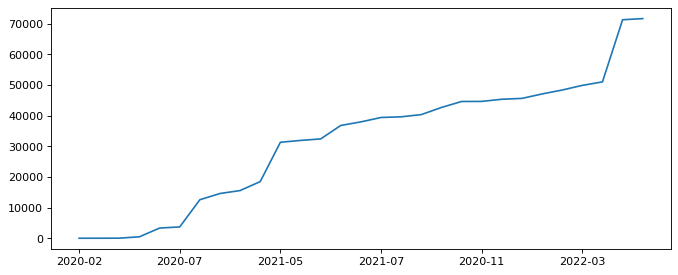

In [47]:
# Events over time
figure(figsize=(10, 4), dpi=80)
df.yearmonth.value_counts().sort_values().plot()

In [32]:
df.columns

Index(['userid', 'event', 'msgid', 'cts', 'deviceCode', 'currentLoyaltyLevel', 'rowId', 'message', 'userId', 'transactionId', 'nudgeId', 'activationAmount', 'treeId', 'loyaltyLevel', 'cardType', 'creationDate', 'product', 'birthDate', 'date', 'yearmonth'], dtype='object')

# Json Information - Device Code

In [73]:
df.deviceCode.value_counts()

c42ceb0d-4756-41c5-979f-6c5ed3adf2c9    293
e1fde2f9-74a8-423d-b136-b6befe043dac    271
d03a7017-9ee1-423e-b788-6904ae58f1f6    256
56e18718-1ed4-438e-add4-5eb67fbeabe7    255
e47b23d4-0b95-418d-b291-72ee99248342    249
                                       ... 
2396cf6a-142f-41fd-8bfa-5027188a4ea1      1
1ea2cff1-0e03-4f14-8d45-6fee2bfa6372      1
808a1d8d-45e8-44f3-a5cc-64c9c7f1d103      1
afec2fa5-a06e-4d55-940b-f97a1c1a2677      1
d5d1b43b-d535-44de-b78c-c7837de9eb4f      1
Name: deviceCode, Length: 108513, dtype: int64

<AxesSubplot:>

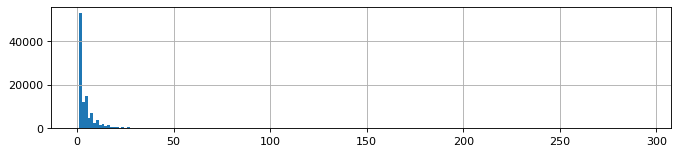

In [50]:
figure(figsize=(10, 2), dpi=80)
df.deviceCode.value_counts().hist(bins = 200)

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='yearmonth'>

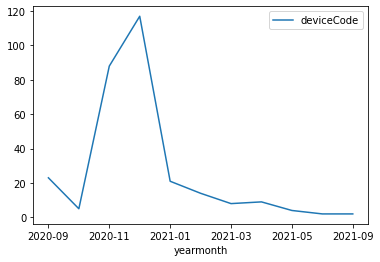

In [56]:
df[['deviceCode', 'yearmonth']][df.deviceCode == 'c42ceb0d-4756-41c5-979f-6c5ed3adf2c9'].groupby(['yearmonth']).count().plot()

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='yearmonth'>

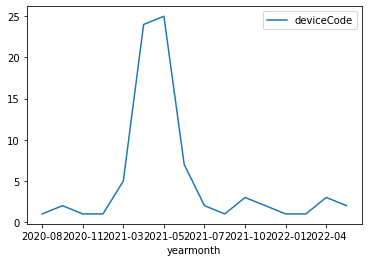

In [71]:
df[['deviceCode', 'yearmonth']][df.deviceCode == 'b52a82ea-789f-4215-820f-888a2bc687aa'].groupby(['yearmonth']).count().plot()

# currentLoyaltyLevel

In [74]:
df.currentLoyaltyLevel.value_counts()

Fan                3088
Friend4Life         253
Fan2                200
Friend              105
StaffMediolanum      68
TeamFB               55
Founder               6
StaffFlowe            5
Name: currentLoyaltyLevel, dtype: int64